In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import anndata
import re
import h5py
import scipy.sparse as scs
import concurrent.futures
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csc_matrix
from concurrent.futures import ThreadPoolExecutor, as_completed
import umap
import random
import multiprocessing
random.seed(123)
from joblib import Parallel, delayed
import warnings
import os
from tqdm import tqdm
import math
from PIL import Image, ImageDraw, ImageFont
import gc
import re
import multiprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
file=['h5ad_harmony/' + x for x in os.listdir('h5ad_harmony')]
file=sorted(file)

In [7]:
celltype=file[50]
print(celltype)

h5ad_harmony/KLRF1+ GZMB+ CD27- EM CD8 T cell.h5ad


In [8]:
adata=sc.read_h5ad(celltype)
adata=adata.raw.to_adata()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


AnnData object with n_obs × n_vars = 162663 × 18082
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'celltype.l1', 'celltype.l1.score', 'celltype.l2', 'celltype.l2.score', 'celltype.l3', 'celltype.l3.score', 'chip_id', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pool_id', 'sampleID', 'well_id', 'celltypist_l1', 'celltypist_l2', 'celltypist_l3', 'predicted_doublet', 'doublet_score', 'age_enrollment', 'biological_sex', 'subject_guid', 'race', 'cmv_status', 'cmv_index', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_2', 'leiden'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

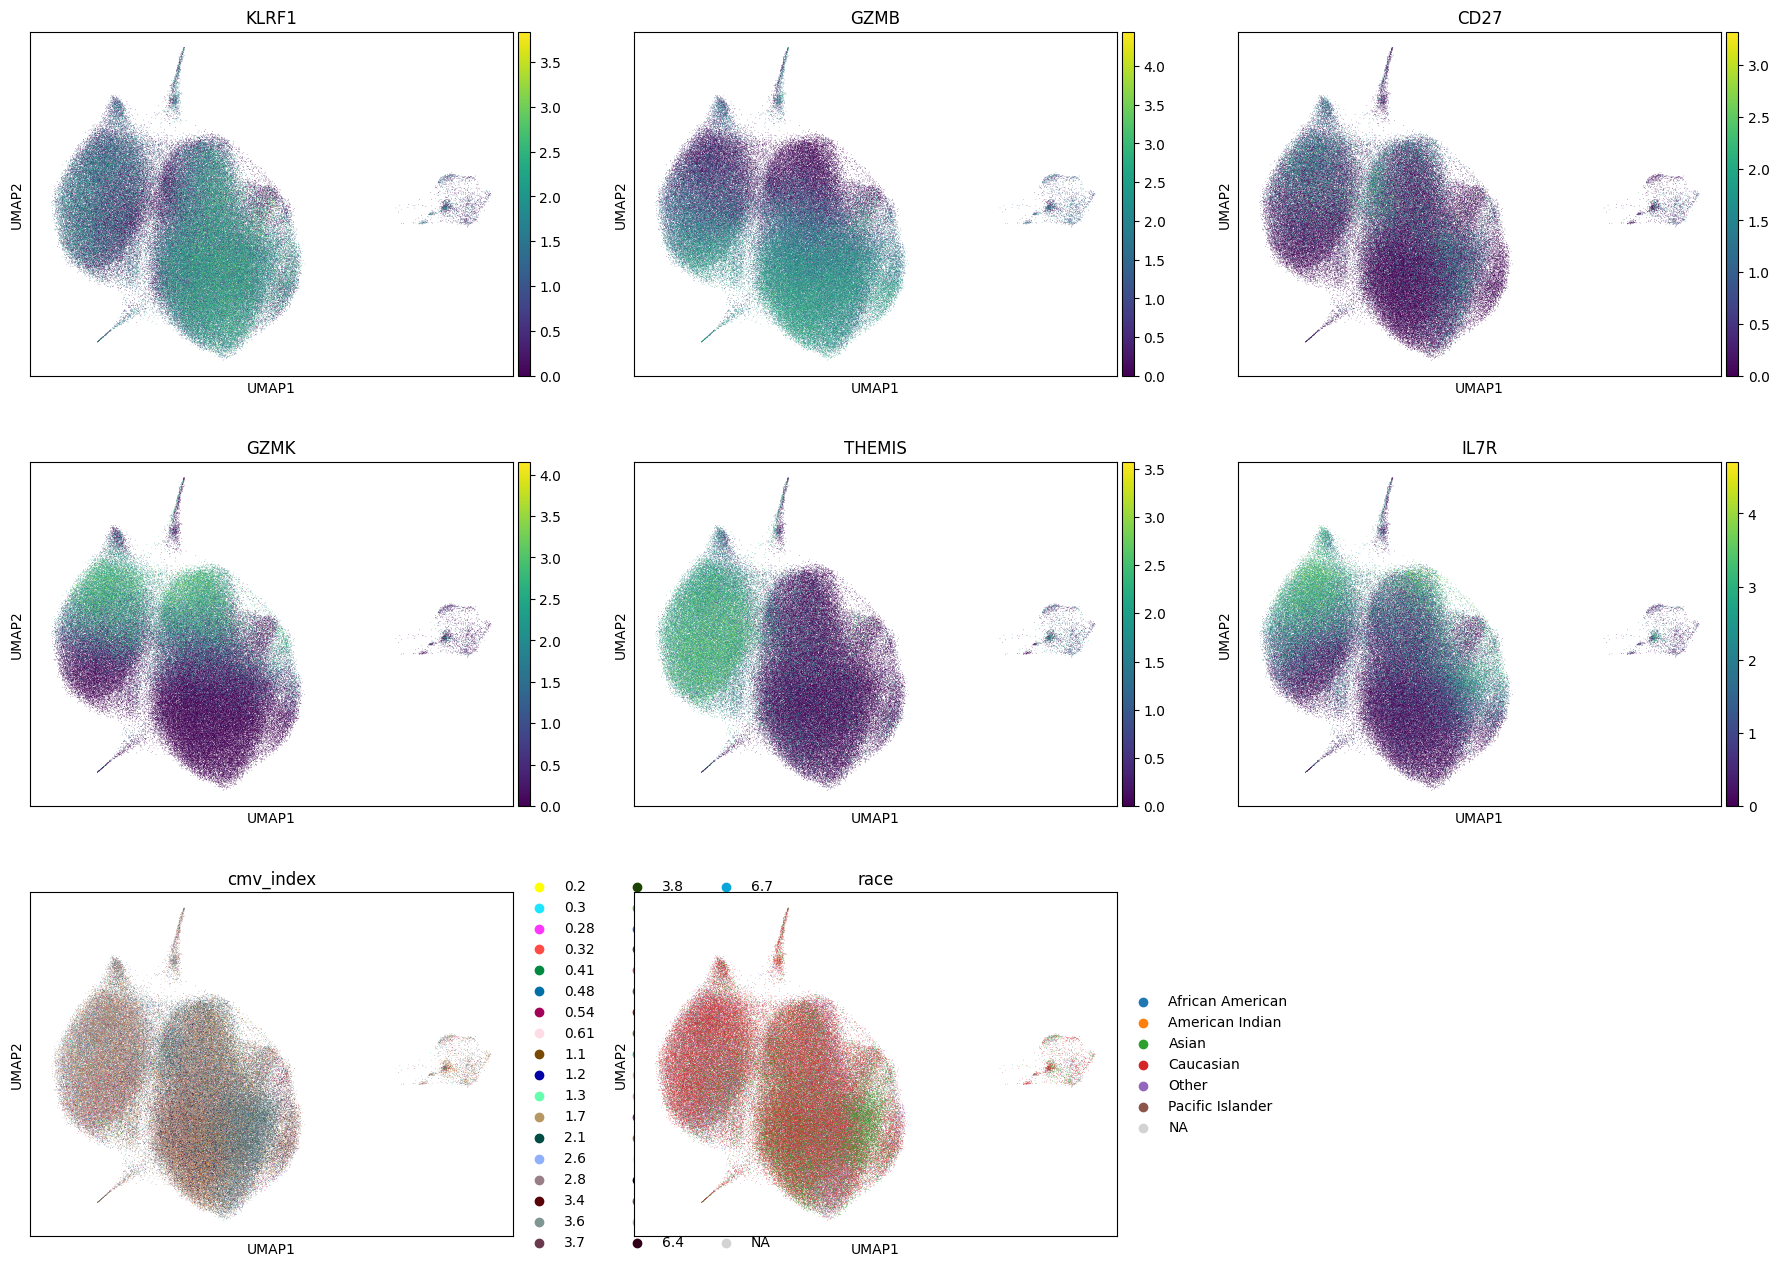

In [13]:
sc.pl.umap(adata, color=['KLRF1','GZMB','CD27','GZMK','THEMIS','IL7R','cmv_index','race'], ncols=3)

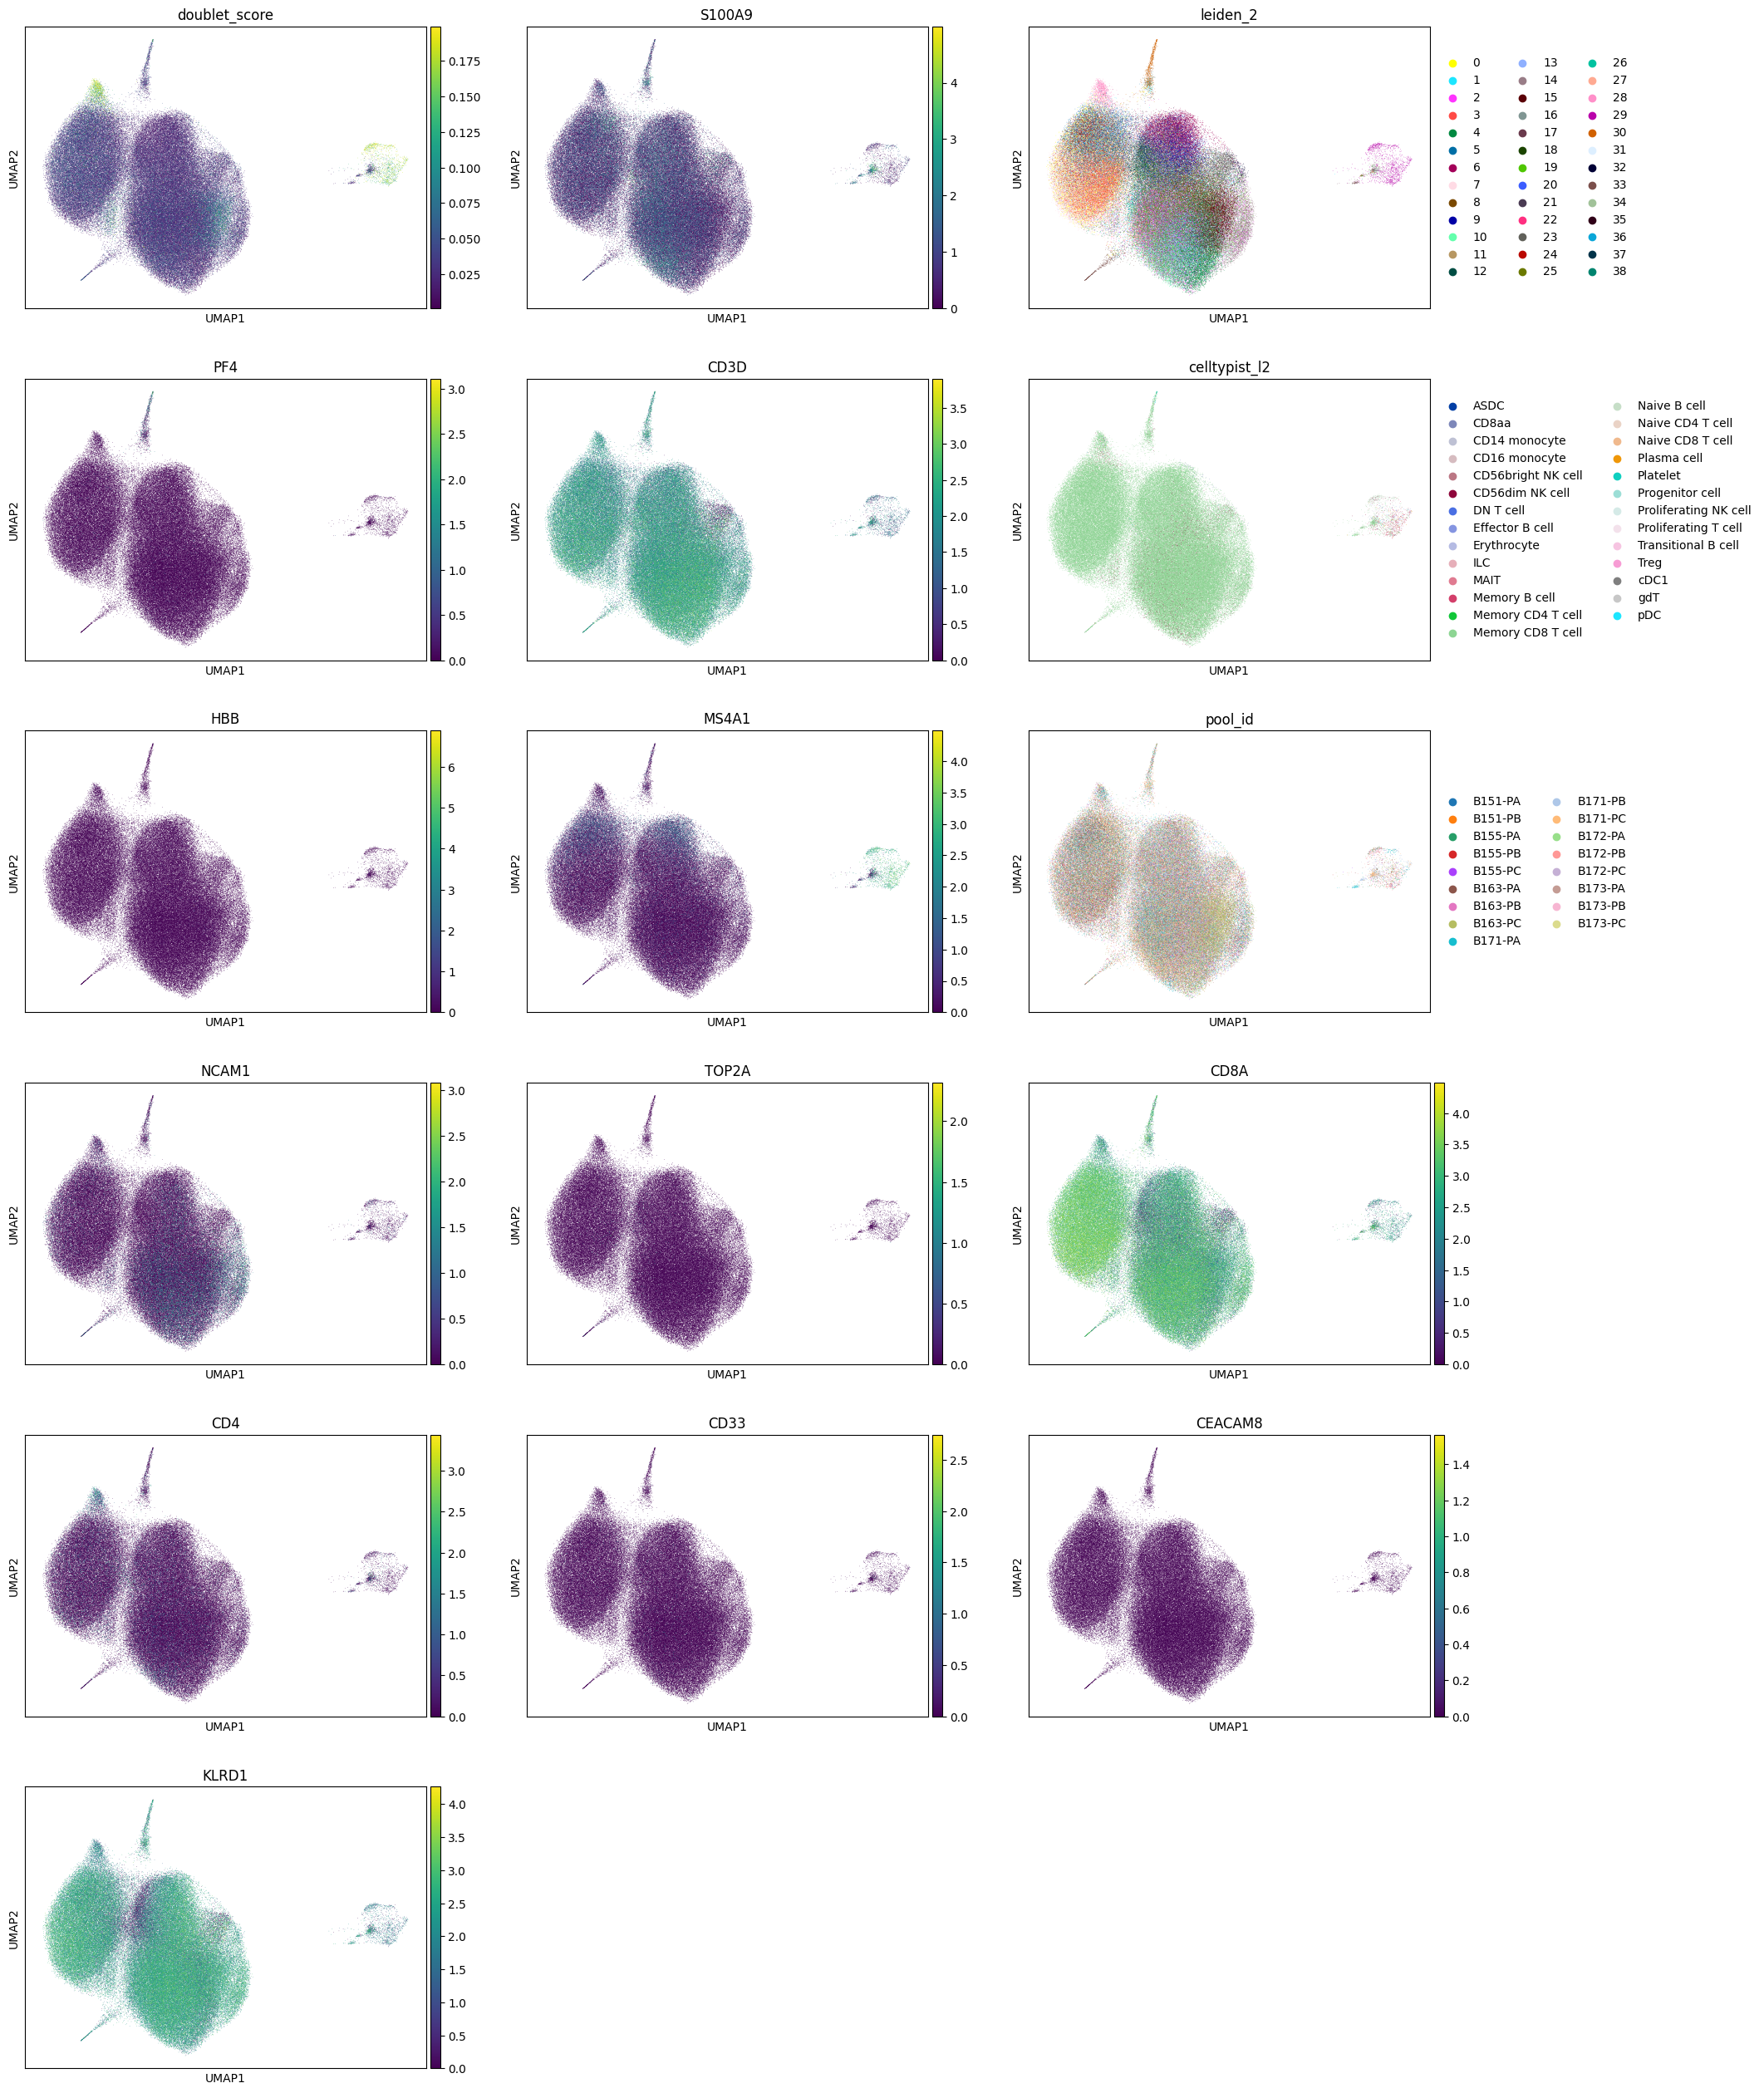

In [6]:

sc.pl.umap(adata, color=['doublet_score', 'S100A9', 'leiden_2',
                             'PF4', 'CD3D', 'celltypist_l2', 
                             'HBB', 'MS4A1','pool_id','NCAM1','TOP2A',
                         'CD8A','CD4','CD33','CEACAM8','KLRD1'], ncols=3)